# Testing random number generation

This is an inherently iterative process so we won't vectorize to begin with, to show how these work in a simpler way. 

We will investigate a "poor" generator that repeats quickly, a more reasonable Park-Miller scheme, and the default `python` scheme from the `random` library. 

In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

In [2]:

poor_seed = 123                         # maintain seed for poor generator
def poor():                             # example from Numerical Recipes
    global poor_seed
    seed = poor_seed
    IM = 6075 ; IA = 106 ; IC = 1283
    seed = (IA * seed + IC) % IM        # linear congruential algorithm
    poor_seed = seed
    return seed / float(IM)

park_miller_seed = 1                    # maintain seed for Park-Miller
def park_miller():                      # Park-Miller generator
    global park_miller_seed
    seed = park_miller_seed
    IA = 16807 ; IC = 2147483647 ; IQ = 127773 ; IR = 2836
    h = seed // IQ
    l = seed % IQ;
    seed = IA * l - IR * h
    if seed <= 0:
        seed += IC
    park_miller_seed = seed
    return seed / float(IC)

def test(generator, name, remark, eyeballtest):
    print (" " + name + "() " + remark)

    print (" checking period ...")
    start = generator()
    max_steps = 1000000
    for i in range(max_steps):
        if generator() == start:
            print (" repeats after " + repr(i) + " steps")
            break
    if i+1 >= max_steps:
        print (" period larger than " + repr(max_steps))

    start_time = time.clock()
    bins = 10000
    print (" binning " + repr(max_steps) + " tries in " + repr(bins) + " bins")
    bin = np.zeros(bins)
    for i in range(max_steps):
        b = int(generator() * bins)
        if b >= 0 and b < bins:
            bin[b] += 1
    expect = max_steps / float(bins)
    chisqr = np.sum( (bin - expect)**2 ) / expect
    cpu_time = time.clock() - start_time
    print (" chi-squar/d.o.f. = " + repr(chisqr/(bins-1.0)))
    print (" CPU time = " + repr(cpu_time) + " seconds")

    for i in range( len(eyeballtest) ):
        eyeballtest[i] = [repr(generator()), repr(generator())]



## Testing random number generators

In [3]:
poor_pairs = np.zeros( (100000, 2) )
park_miller_pairs = np.zeros( (100000, 2) )
py_pairs = np.zeros( (100000, 2) )
test(poor, "poor", "from Numerical Recipes period 6,075", poor_pairs)
test(park_miller, "park_miller", "Park-Miller multiplicative generator", park_miller_pairs)
test(random.random, "random.random", "from Python standard library", py_pairs)

 poor() from Numerical Recipes period 6,075
 checking period ...
 repeats after 6074 steps
 binning 1000000 tries in 10000 bins


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 chi-squar/d.o.f. = 64.61696169616961
 CPU time = 1.343504 seconds
 park_miller() Park-Miller multiplicative generator
 checking period ...
 period larger than 1000000
 binning 1000000 tries in 10000 bins
 chi-squar/d.o.f. = 0.9921372137213721
 CPU time = 1.606789 seconds
 random.random() from Python standard library
 checking period ...
 period larger than 1000000
 binning 1000000 tries in 10000 bins
 chi-squar/d.o.f. = 0.993985398539854
 CPU time = 0.8761840000000003 seconds


## "Eyeball" test

Now we plot the generator sequence as pairs on a scatter plot. Bad generators are immediately discernible due to their obvious correlations. 

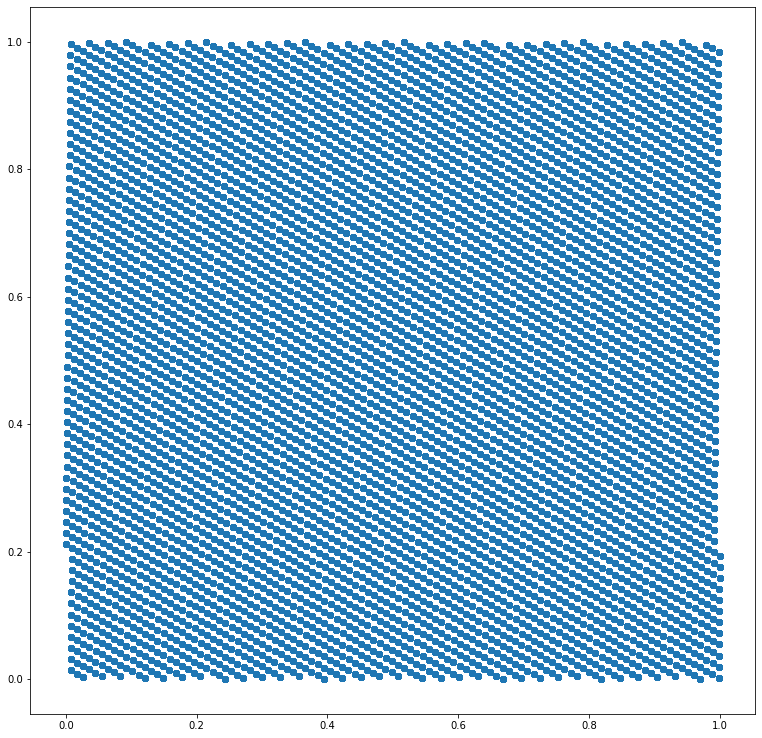

In [4]:
f1 = plt.figure(1, figsize=(13,13))
plt.scatter(poor_pairs[:,0], poor_pairs[:,1])
plt.show()

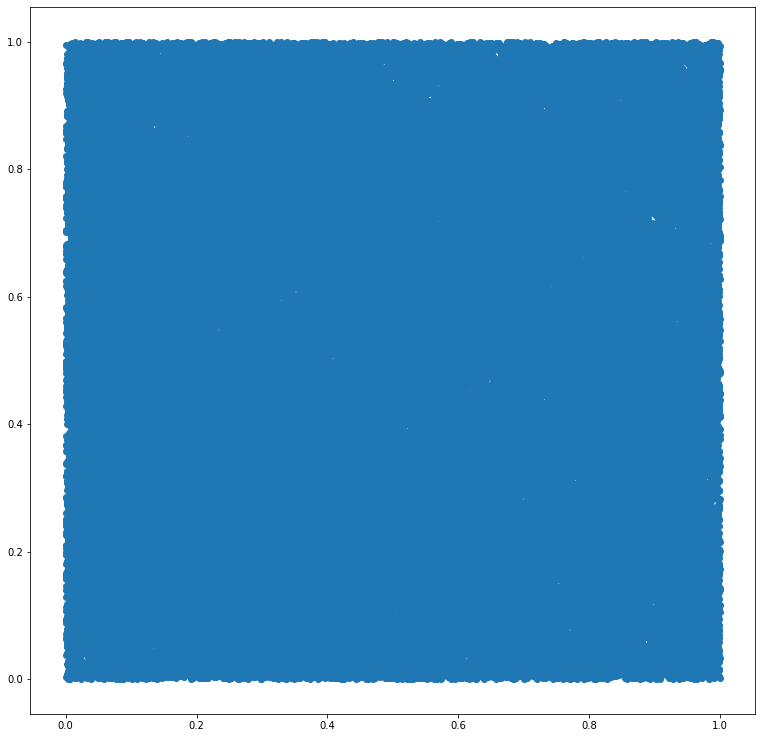

In [5]:
f2 = plt.figure(2, figsize=(13,13))
plt.scatter(park_miller_pairs[:,0], park_miller_pairs[:,1])
plt.show()

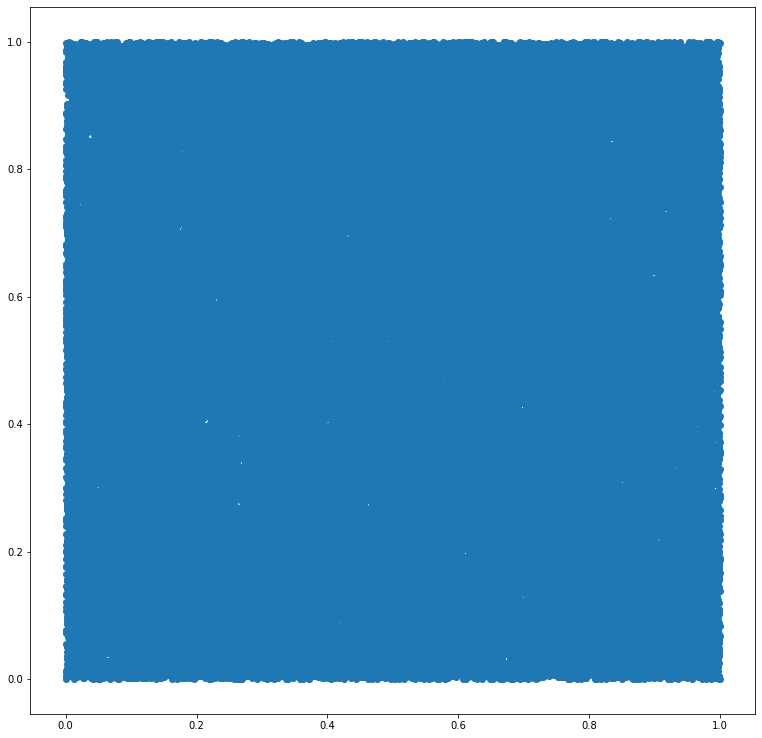

In [6]:
f3 = plt.figure(3, figsize=(13,13))
plt.scatter(py_pairs[:,0], py_pairs[:,1])
plt.show()